# Home work 5: Basic Artificial Neural Networks

На семинаре вы написали нейронную сеть. Настало время ее использовать!  В этом ноутбуке вы создадите нейронную сеть и методом градиентного спуска обучите ее распознавать цифры.

В этой домашней работе вам потребуются три ноутбука: **modules.ipynb**, **main.ipynb**, с помощью которого вы сможете отладить реализацию методов в modules.ipynb, и **nn.ipynb** (этот ноутбук). Сдать нужно все три ноутбука.

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework (5 баллов)

Решите раздел backward в main.ipynb, убедитесь что все ячейки отрабатывают без ошибок и что относительная погрешность там же не превышает 1e-4 для каждого теста.

# Toy example

In [2]:
%run modules.ipynb
%load_ext autoreload
%autoreload 2

Оптимизация методом стохастического градиентного спуска уже написана за вас.

In [15]:
def sgd(x, dx, config):
    """        
        config:
            - learning_rate
    """
    
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            cur_x -=  config['learning_rate'] * cur_dx

Давайте еще раз протестируем наши модули на искуственно сгенерированной выборке.

В этом блоке вам не надо ничего реализовывать.

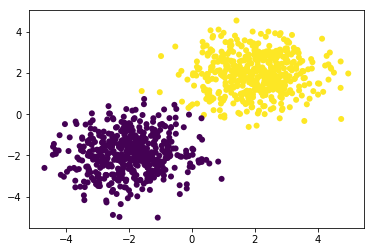

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Мы решаем задачу многоклассовой классификации с двумя классами. Истинный вектор для каждого объекта - это вектор из 0 и 1, в котором 1 стоит на том месте, какому классу принадлежит объект. Хочется чтобы сеть выдавала набор чисел, каждое из которых являлось бы степенью уверенности сети в принадлежности объекта соответствующему классу (так вектор (0.9, 0.1) означал бы что сеть считает, что объект скорее всего принадлежит нулевому классу, а не первому). Давайте зададим пару ограничений на уверенность:

1) Наша уверенность не может быть отрицательной. 

2) В сумме наша уверенность по всем объектам должна давать 1.

Набор чисел на которых выполнены эти два свойства называют распределением вероятностей.

Сеть может выдавать отрицательные числа, не говоря о том, что сумма предсказаний для объекта может быть больше единицы. Чтобы получить из произвольного набора чисел распределение вероятностей придумали функцию **SoftMax**. Её формула: $$output_i = \frac{e^{input_i}}{\sum_n e^{input_n}}.$$

Что он делает - это переводит входной вектор в вектор вероятностей (неотрицательных чисел в сумме дающих единицу).

In [12]:
net = Sequential()
net.add(Linear(2, 2))
net.add(SoftMax())

criterion = MSECriterion()

print(net)

# Попробуйте что-нибудь вроде этого:

net2 = Sequential()
net2.add(Linear(2, 4))
net2.add(Sigmoid())
net2.add(Linear(4, 2))
net2.add(SoftMax())

print(net2)

Linear 2 -> 2
SoftMax

Linear 2 -> 4
Sigmoid
Linear 4 -> 2
SoftMax



In [6]:
optimizer_config = {'learning_rate' : 1e-2}
optimizer_state = {}

n_epoch = 80
batch_size = 128

In [7]:
# генератор минибатчей
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # после каждой эпохи мы заново перемешиваем объекты тренировочной выборки
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Давайте обучим модель.

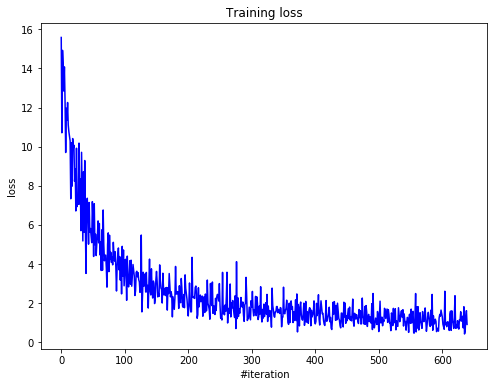

Current loss: 0.911962


In [8]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

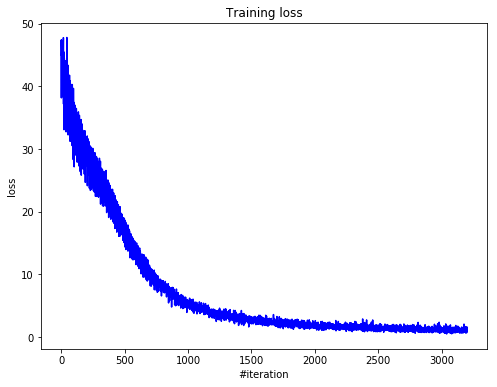

Current loss: 0.739166


In [9]:
optimizer_config = {'learning_rate' : 1e-2}
optimizer_state = {}

n_epoch = 400
batch_size = 128

loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net2.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net2.backward(x_batch, dp)
        
        # Update weights
        sgd(net2.getParameters(), 
                     net2.getGradParameters(), 
                     optimizer_config)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification (5 баллов)

Ваша задача - обучиться распознавать рукописные цифры из датасета MNIST.

In [4]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    X, y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=y)

def one_hot_encode(data, n_classes=10):
    n_objects = len(data)
    data_encoded = np.zeros((n_objects, n_classes))
    data_encoded[np.arange(n_objects), data.astype(int)] = 1
    return data_encoded

y = one_hot_encode(y)

Поэкспериментируйте с разным количеством скрытых слоев, с разным размером слоев, попробуйте поменять функцию активации. По итогу напишите отчет о проведенных экспериментах который включате в себя описание того, что вы сделали, и то, какую точность по метрике mse вы смогли получить.

# Отчет

Подготовим фунцию обучения:

In [35]:
optimizer_config = {'learning_rate' : 1e-2}
optimizer_state = {}

n_epoch = 80
batch_size = 80

In [6]:
# генератор минибатчей
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # после каждой эпохи мы заново перемешиваем объекты тренировочной выборки
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

In [7]:
from tqdm import tqdm

In [8]:
def train(net):

    loss_history = []

    for i in tqdm(range(n_epoch)):
        for x_batch, y_batch in get_batches((X, y), batch_size):
        
            net.zeroGradParameters()
        
            # Forward
            predictions = net.forward(x_batch)
        
            loss = criterion.forward(predictions, y_batch)
    
            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)
        
            # Update weights
            sgd(net.getParameters(), net.getGradParameters(), optimizer_config)      
        
            loss_history.append(loss)

        # Visualize
        display.clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        
        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b')
        plt.show()
    
        print('Current loss: %f' % loss)    

## Сеть 1

Linear 784 -> 32

Sigmoid 

Linear 32 -> 10 

SoftMax

In [36]:
# Попробуйте что-нибудь вроде этого:

net1 = Sequential()
net1.add(Linear(784, 32))
net1.add(Sigmoid())
net1.add(Linear(32, 10))
net1.add(SoftMax())

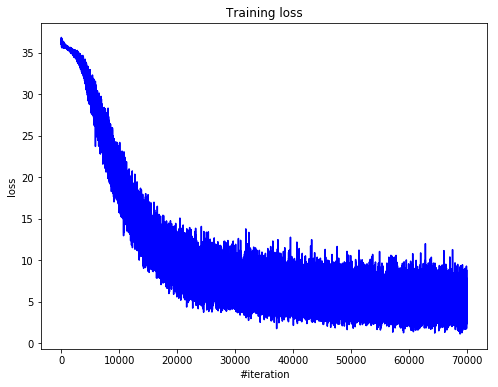

100%|██████████| 80/80 [00:52<00:00,  1.54it/s]

Current loss: 4.238629


In [37]:
train(net1)

In [38]:
accuracy_score(np.argmax(y, axis=1), np.argmax(net1.forward(X), axis=1))

0.92305714285714291

## Сеть 2
Linear 784 -> 64

Sigmoid

Linear 64 -> 32

Sigmoid

Linear 32 -> 10

SoftMax

In [39]:
net2 = Sequential()
net2.add(Linear(784, 64))
net2.add(Sigmoid())
net2.add(Linear(64, 32))
net2.add(Sigmoid())
net2.add(Linear(32, 10))
net2.add(SoftMax())

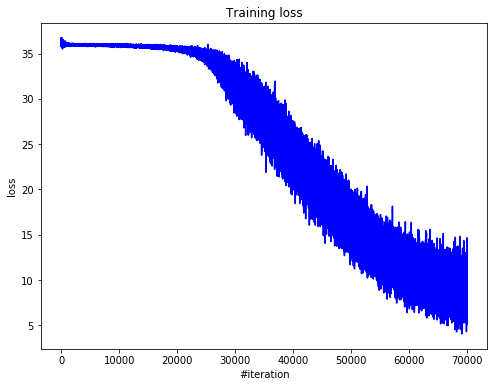

100%|██████████| 80/80 [01:19<00:00,  1.00it/s]

Current loss: 8.802822


In [40]:
train(net2)

In [41]:
accuracy_score(np.argmax(y, axis=1), np.argmax(net2.forward(X), axis=1))

0.87551428571428569

## Сеть 3

Linear 784 -> 64

Sigmoid

Linear 64 -> 32

ReLU

Linear 32 -> 10

SoftMax

In [42]:
net3 = Sequential()
net3.add(Linear(784, 64))
net3.add(Sigmoid())
net3.add(Linear(64, 32))
net3.add(ReLU())
net3.add(Linear(32, 10))
net3.add(SoftMax())

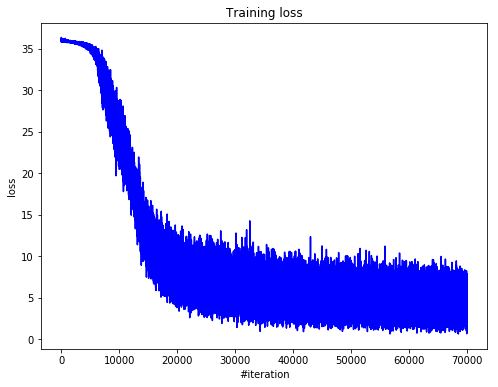

100%|██████████| 80/80 [01:22<00:00,  1.03s/it]

Current loss: 3.727687


In [43]:
train(net3)

In [44]:
accuracy_score(np.argmax(y, axis=1), np.argmax(net3.forward(X), axis=1))

0.93521428571428566

## Сеть 4

Linear 784 -> 64

ReLU

Linear 64 -> 32

Sigmoid

Linear 32 -> 10

SoftMax

In [45]:
net4 = Sequential()
net4.add(Linear(784, 64))
net4.add(ReLU())
net4.add(Linear(64, 32))
net4.add(Sigmoid())
net4.add(Linear(32, 10))
net4.add(SoftMax())

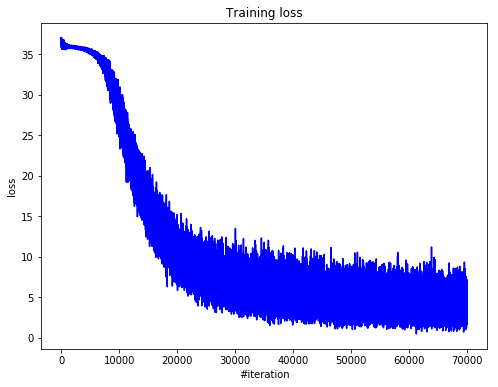

100%|██████████| 80/80 [01:15<00:00,  1.06it/s]

Current loss: 2.593188


In [46]:
train(net4)

In [47]:
accuracy_score(np.argmax(y, axis=1), np.argmax(net4.forward(X), axis=1))

0.9396714285714286

## Сеть 5
Linear 784 -> 64

ReLU

Linear 64 -> 10

SoftMax

In [48]:
net5 = Sequential()
net5.add(Linear(784, 64))
net5.add(ReLU())
net5.add(Linear(64, 10))
net5.add(SoftMax())

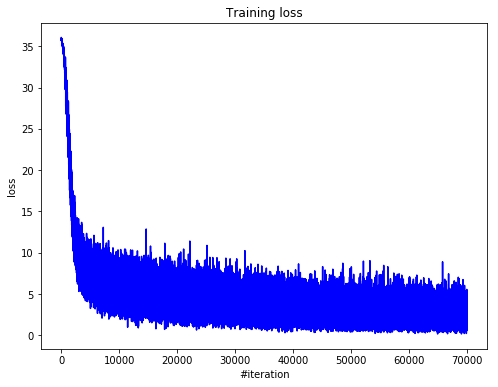

100%|██████████| 80/80 [01:10<00:00,  1.13it/s]

Current loss: 2.893506


In [49]:
train(net5)

In [50]:
accuracy_score(np.argmax(y, axis=1), np.argmax(net5.forward(X), axis=1))

0.96207142857142858

## Сеть 6
Linear 784 -> 1024

Sigmoid

Linear 1024 -> 512

ReLU

Linear 512 -> 128

Sigmoid

Linear 128 -> 10

SoftMax

In [23]:
net6 = Sequential()
net6.add(Linear(784, 1024))
net6.add(Sigmoid())
net6.add(Linear(1024, 512))
net6.add(ReLU())
net6.add(Linear(512, 128))
net6.add(Sigmoid())
net6.add(Linear(128, 10))
net6.add(SoftMax())

### Эпохи 1-20

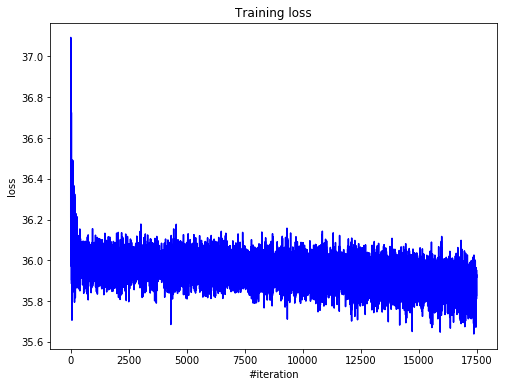

100%|██████████| 20/20 [06:24<00:00, 19.25s/it]

Current loss: 35.917273


In [29]:
train(net6)

### Эпохи 21-40

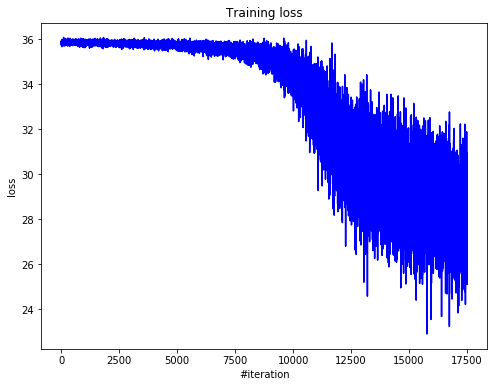

100%|██████████| 20/20 [53:35<00:00, 160.79s/it]

Current loss: 28.205818


In [36]:
train(net6)

### Эпохи 41-80

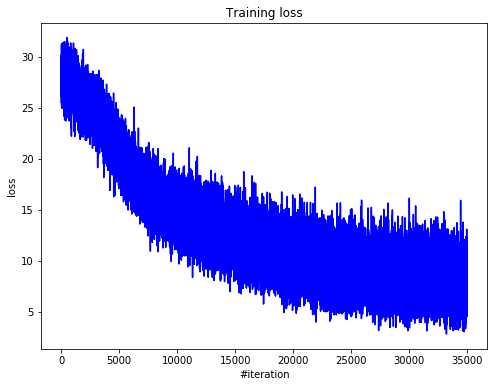

100%|██████████| 40/40 [58:47<00:00, 88.19s/it]

Current loss: 4.641779


In [38]:
train(net6)

### Эпохи 81 - 120

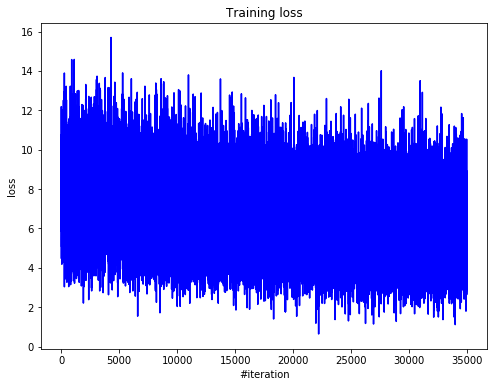

100%|██████████| 40/40 [2:09:37<00:00, 194.43s/it]

Current loss: 6.003060


In [39]:
train(net6)

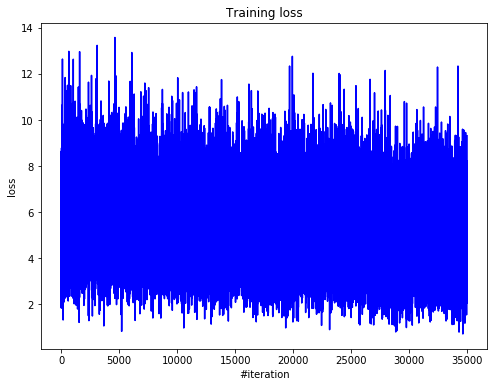

100%|██████████| 40/40 [12:18<00:00, 18.46s/it]

Current loss: 9.314816


In [40]:
train(net6)

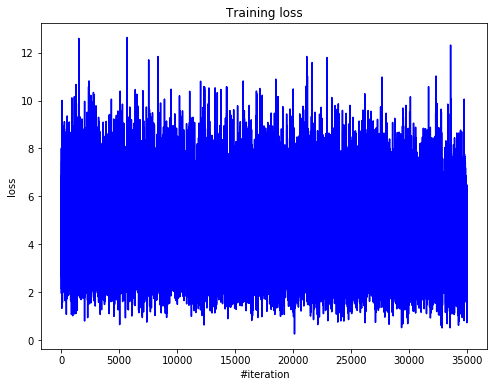

100%|██████████| 40/40 [12:06<00:00, 18.17s/it]

Current loss: 2.255271


In [41]:
train(net6)

Попробовал понизить learning rate на один порядок:

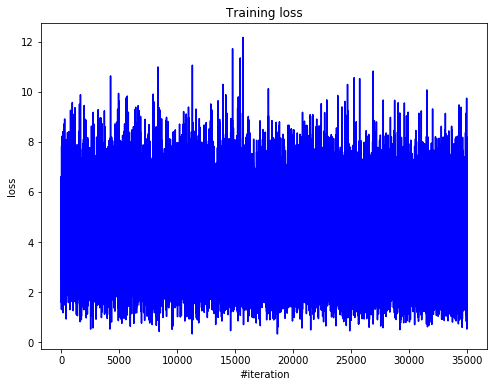

100%|██████████| 40/40 [11:55<00:00, 17.89s/it]

Current loss: 3.042988


In [42]:
train(net6)

Судя по всему, я застрял на 2-10%
К тому же, эта сеть работает очень долго. Увеличение количества нейронов не пошло на пользу

Точность я не рассчитывал, так как потерял веса, а переобучать долго.

## Проверим работу сети
Возьму сеть №5.
Напишу функцию для просмотра цифры и вывода предсказания сети.

In [52]:
def show_im(let, net):
    img = X[let]
    img = img.reshape(28,28)
    plt.figure()
    plt.imshow(X[let].reshape(28,28))
    plt.show()
    pred = net.forward(X)[let]
    print("True value:", np.argmax(y[let]))
    print("Predicted value:", np.argmax(pred))
    print("Softmax:", np.max(pred))
    print(pred)

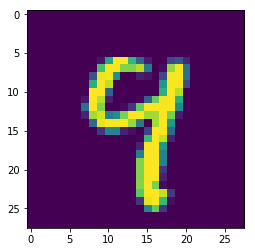

True value: 9
Predicted value: 9
Softmax: 0.843379436181
[  2.95938442e-05   3.36400751e-06   2.56470801e-05   2.61179021e-03
   1.22323754e-01   8.76910204e-04   2.63482781e-06   1.25947484e-02
   1.81521215e-02   8.43379436e-01]


In [54]:
show_im(59490, net5)

## Accuracy

In [26]:
from sklearn.metrics import accuracy_score

Наибольшую точность я получил на сети №5, которая состоит из двух полносвязных слоёв и одного ReLu. 
Её точность 96%.

Я заметил, что ReLu обучается гораздо быстрее.